# Model Training workbook
This is an workbook for student to train their model using train dataset 

## Library imports

In [16]:
import Common.Utilities as util
import Common.Preprocessing as preprocessing
import Common.Visualization as visualization
import Common.Modeling as modeling
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
trainDataset = util.getTrainDataset()
display(trainDataset)

,WellName,TestUsage,Date,OilRate (STB/D),WaterRate (STB/D),GasRate (MSCF/D),GasLiftRate (MSCF/D),LiquidRate (STB/D),WCUT (%),GLR (SCF/STB),FWHP (Psi),Tubing ID (Inch),FWHT (DegC),WHP Fluctuation (%),WHPFluctuation (Psi),ChokeFluctuation (%)
0,WELL-101,Informational,4/1/2015,2571.631594,103.139600,10.282097,0.000000,2674.771194,3.856016,3844.103231,1975.170995,5.5,30.910000,0.854364,1.163498,0.531681
1,WELL-101,Informational,9/11/2015,5540.583844,86.159300,20.652250,0.000000,5626.743144,1.531246,3670.373696,1685.341560,5.5,32.386000,2.404750,2.794319,0.705730
2,WELL-101,Allocation,2/1/2016,2806.340784,339.606000,12.691881,0.000000,3145.946784,10.795033,4034.359737,1715.799540,5.5,28.223000,2.305619,2.727547,0.429159
3,WELL-101,Allocation,4/10/2016,4160.526502,100.317472,16.698747,0.000000,4260.843974,2.354404,3919.117152,1580.789492,5.5,31.410690,0.551250,0.600815,0.572214
4,WELL-101,Informational,27/1/2017,3454.289851,1647.591521,17.773554,0.000000,5101.881372,32.293803,3483.725403,1628.509885,5.5,27.172501,0.271809,0.305191,0.455387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,WELL-150ST1,Allocation,20/4/2020,1847.208476,7083.319432,3.326113,4.827774,8930.527908,79.315798,372.443030,338.527104,5.5,64.061188,6.578408,1.535439,0.164513
838,WELL-150ST1,Allocation,17/5/2020,1806.208032,6969.715157,1.334443,5.228662,8775.923189,79.418598,152.057225,343.091742,5.5,63.599609,32.857600,7.772564,0.021454
839,WELL-150ST1,Allocation,23/8/2020,1918.824652,7131.034302,3.307441,4.874364,9049.858954,78.797187,365.468834,317.502393,5.5,63.675899,8.146733,1.783400,0.076294
840,WELL-150ST1,Informational,21/12/2020,2532.847708,6842.891084,2.681881,5.641326,9375.738792,72.985087,286.044730,326.354948,5.5,63.942928,10.172081,2.288855,0.209808


## Data Pre-processing

In [3]:
trainDataset = preprocessing.getSluggingClass(trainDataset, WHPFluctuationTreshold=10)
trainDataset.head()

,WellName,TestUsage,Date,OilRate (STB/D),WaterRate (STB/D),GasRate (MSCF/D),GasLiftRate (MSCF/D),LiquidRate (STB/D),WCUT (%),GLR (SCF/STB),FWHP (Psi),Tubing ID (Inch),FWHT (DegC),WHP Fluctuation (%),WHPFluctuation (Psi),ChokeFluctuation (%),SluggingClass
0,WELL-101,Informational,4/1/2015,2571.631594,103.139600,10.282097,0.0,2674.771194,3.856016,3844.103231,1975.170995,5.5,30.910000,0.854364,1.163498,0.531681,Non-Slugging
1,WELL-101,Informational,9/11/2015,5540.583844,86.159300,20.652250,0.0,5626.743144,1.531246,3670.373696,1685.341560,5.5,32.386000,2.404750,2.794319,0.705730,Non-Slugging
2,WELL-101,Allocation,2/1/2016,2806.340784,339.606000,12.691881,0.0,3145.946784,10.795033,4034.359737,1715.799540,5.5,28.223000,2.305619,2.727547,0.429159,Non-Slugging
3,WELL-101,Allocation,4/10/2016,4160.526502,100.317472,16.698747,0.0,4260.843974,2.354404,3919.117152,1580.789492,5.5,31.410690,0.551250,0.600815,0.572214,Non-Slugging
4,WELL-101,Informational,27/1/2017,3454.289851,1647.591521,17.773554,0.0,5101.881372,32.293803,3483.725403,1628.509885,5.5,27.172501,0.271809,0.305191,0.455387,Non-Slugging


In [4]:
trainDataset.describe()

,OilRate (STB/D),WaterRate (STB/D),GasRate (MSCF/D),GasLiftRate (MSCF/D),LiquidRate (STB/D),WCUT (%),GLR (SCF/STB),FWHP (Psi),Tubing ID (Inch),FWHT (DegC),WHP Fluctuation (%),WHPFluctuation (Psi),ChokeFluctuation (%)
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,3608.869897,4989.780762,10.942566,2.795814,8598.650659,53.872313,1389.379423,536.598160,5.621140,51.676744,25.862102,6.521885,0.139993
std,2429.252412,3652.390757,14.583617,2.165915,3599.368936,29.023735,1968.204729,379.512206,0.408942,13.913511,32.545556,7.239002,0.218310
min,385.134083,0.000000,0.000000,0.000000,1126.327134,0.000000,0.000000,222.060723,5.500000,13.572901,0.009619,0.003519,0.000000
25%,1804.394206,1834.775954,2.076868,0.000000,6139.224320,31.443821,237.395930,317.604392,5.500000,45.052265,4.092250,1.356629,0.016693
50%,3082.135855,4802.689814,3.830546,3.456353,8197.525037,64.716623,592.888855,375.393160,5.500000,52.411871,12.959419,3.638325,0.042915
75%,4738.928819,7438.476735,13.807068,4.517284,10963.914808,77.179232,1586.448106,559.186503,5.500000,60.364685,35.047020,9.124419,0.143057
max,13812.466680,19150.218420,102.449652,9.802245,21210.681470,94.214853,14611.616940,2571.859955,7.000000,167.795837,243.290349,41.971846,0.987068


Separate between categorical variable and numerical

In [5]:
catVar = trainDataset[["WellName", "TestUsage", "Date", "SluggingClass"]]
numVar = trainDataset[["OilRate (STB/D)", "WaterRate (STB/D)", "GasRate (MSCF/D)", "GasLiftRate (MSCF/D)", "LiquidRate (STB/D)", "WCUT (%)", "GLR (SCF/STB)", "FWHP (Psi)", "Tubing ID (Inch)", "FWHT (DegC)", "WHP Fluctuation (%)", "WHPFluctuation (Psi)", "ChokeFluctuation (%)"]]

In [32]:
# sort the dataframe
trainDataset.sort_values(by='WellName', axis=0, inplace=True)

# set the index to be this and don't drop
trainDataset.set_index(keys=['WellName'], drop=False,inplace=True)

# get a list of names
names=trainDataset['WellName'].unique().tolist()

# now we can perform a lookup on a 'view' of the dataframe
joe = trainDataset.loc[trainDataset.WellName=='WELL-101']

    

ValueError: 'WellName' is both an index level and a column label, which is ambiguous.

## arranging data

name well


In [6]:
wellname = trainDataset[["WellName"]]
wellname.describe()

,WellName
count,842
unique,28
top,WELL-143
freq,56


In [7]:
groupByWell = trainDataset.groupby(["WellName"])
lst_wellname = [groupByWell.get_group(x) for x in groupByWell.groups]

# test well number 2
df_wellname1 = pd.DataFrame(data =lst_wellname[0], columns=["WellName", "TestUsage", "Date","OilRate (STB/D)", "WaterRate (STB/D)", "GasRate (MSCF/D)", "GasLiftRate (MSCF/D)", "LiquidRate (STB/D)", "WCUT (%)", "GLR (SCF/STB)", "FWHP (Psi)", "Tubing ID (Inch)", "FWHT (DegC)", "WHP Fluctuation (%)", "WHPFluctuation (Psi)", "ChokeFluctuation (%)", "SluggingClass"])
    
df_wellname1

,WellName,TestUsage,Date,OilRate (STB/D),WaterRate (STB/D),GasRate (MSCF/D),GasLiftRate (MSCF/D),LiquidRate (STB/D),WCUT (%),GLR (SCF/STB),FWHP (Psi),Tubing ID (Inch),FWHT (DegC),WHP Fluctuation (%),WHPFluctuation (Psi),ChokeFluctuation (%),SluggingClass
0,WELL-101,Informational,4/1/2015,2571.631594,103.139600,10.282097,0.0,2674.771194,3.856016,3844.103231,1975.170995,5.5,30.910000,0.854364,1.163498,0.531681,Non-Slugging
1,WELL-101,Informational,9/11/2015,5540.583844,86.159300,20.652250,0.0,5626.743144,1.531246,3670.373696,1685.341560,5.5,32.386000,2.404750,2.794319,0.705730,Non-Slugging
2,WELL-101,Allocation,2/1/2016,2806.340784,339.606000,12.691881,0.0,3145.946784,10.795033,4034.359737,1715.799540,5.5,28.223000,2.305619,2.727547,0.429159,Non-Slugging
3,WELL-101,Allocation,4/10/2016,4160.526502,100.317472,16.698747,0.0,4260.843974,2.354404,3919.117152,1580.789492,5.5,31.410690,0.551250,0.600815,0.572214,Non-Slugging
4,WELL-101,Informational,27/1/2017,3454.289851,1647.591521,17.773554,0.0,5101.881372,32.293803,3483.725403,1628.509885,5.5,27.172501,0.271809,0.305191,0.455387,Non-Slugging
5,WELL-101,Allocation,6/5/2017,3386.404561,129.539440,18.365458,0.0,3515.944001,3.684343,5223.478456,1595.866153,5.5,23.964291,0.771406,0.848785,0.836861,Non-Slugging
6,WELL-101,Allocation,27/7/2017,4213.853888,146.342826,21.396161,0.0,4360.196714,3.356335,4907.155038,1578.023553,5.5,29.930571,0.333083,0.362396,0.786797,Non-Slugging
7,WELL-101,Informational,29/12/2017,6083.819551,55.217420,31.399462,0.0,6139.036971,0.899448,5114.721105,1492.401870,5.5,33.089191,0.101950,0.104904,0.224117,Non-Slugging
8,WELL-101,Informational,1/11/2018,5102.668133,0.000000,35.579322,0.0,5102.668133,0.000000,6972.689829,1560.179515,5.5,29.293510,1.258941,1.354248,0.987068,Non-Slugging
9,WELL-101,Allocation,1/11/2018,5690.099976,14.562595,37.318512,0.0,5704.662571,0.255275,6541.756313,1511.213256,5.5,30.460819,1.372949,1.430534,0.772491,Non-Slugging


## DATA VISUALIZATION

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

**Univariate Analysis**

for numerical:
1. scatterplot
2. histogram
3. box plot
4. line plot

link: https://www.geeksforgeeks.org/data-visualization-with-python/

for categorical:
1. categorical scatter plot
2. boxplot
3. violinplot

link: https://seaborn.pydata.org/tutorial/categorical.html

https://www.statisticshowto.com/univariate/

BAR CHART

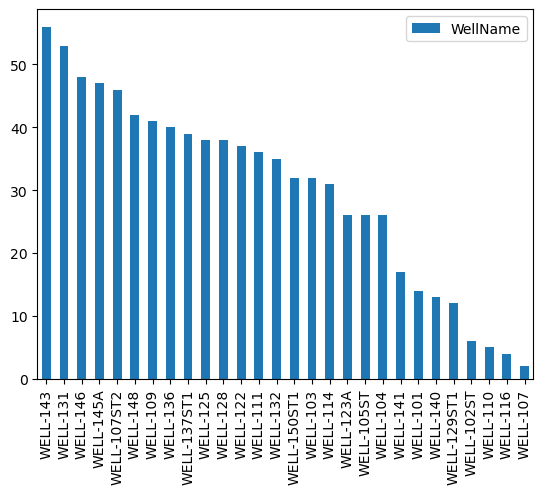

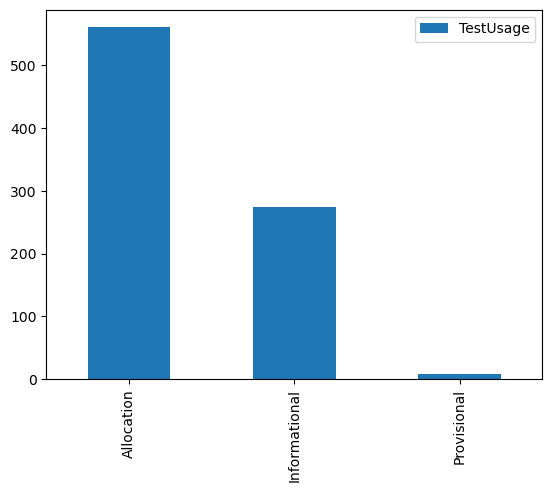

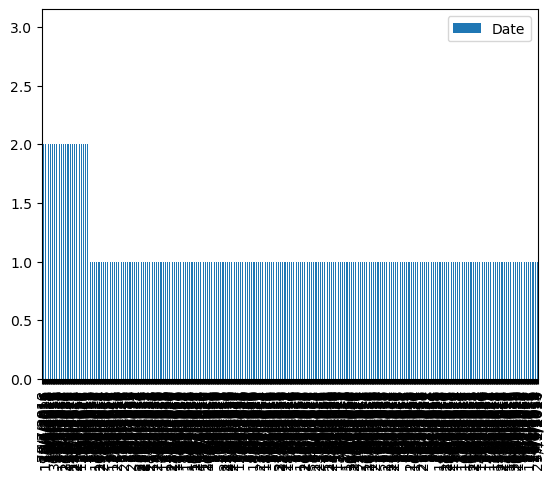

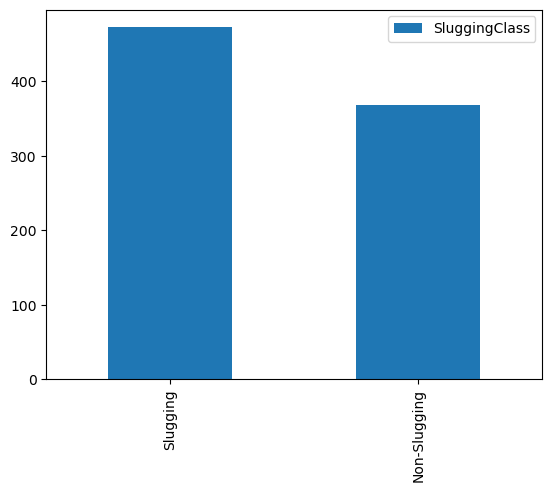

In [10]:
a = []
for i in catVar:
    a.append(catVar[i].value_counts().to_frame())


for i in range(4):
    a[i].plot.bar()

In [11]:
catVar[["Date"]]

,Date
0,4/1/2015
1,9/11/2015
2,2/1/2016
3,4/10/2016
4,27/1/2017
...,...
837,20/4/2020
838,17/5/2020
839,23/8/2020
840,21/12/2020


STACKED BAR CHART(take oil rate, water rate, gas rate and liquid rate)

In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# x = df_wellname
# sns.set(style='white')
# # x and y are lists
# x.set_index('WellName').plot(kind='bar', stacked=True, color=['chocolate', 'yellow'])
# # sns.barplot(x=catVar[["WellName"]], y=catVar[["TestUsage", "SluggingClass"]], color='goldenrod', ax=ax, label="Some Label")
# ax.set_xlabel("X-Label")
# ax.set_ylabel("Y-Label")


Num var:
- histogram

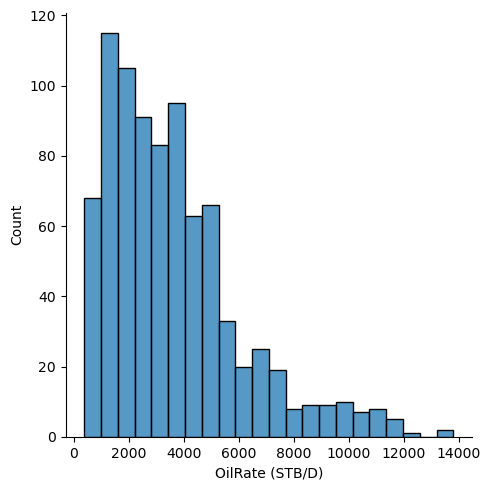

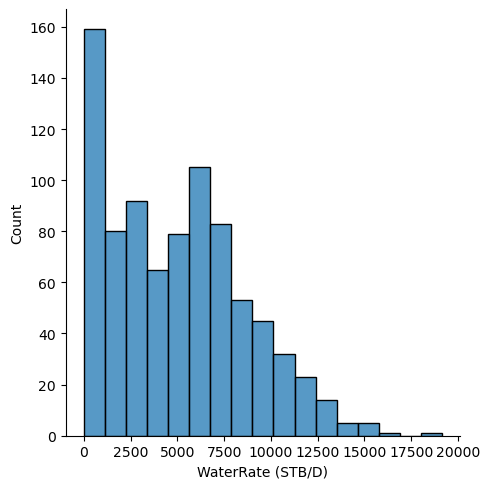

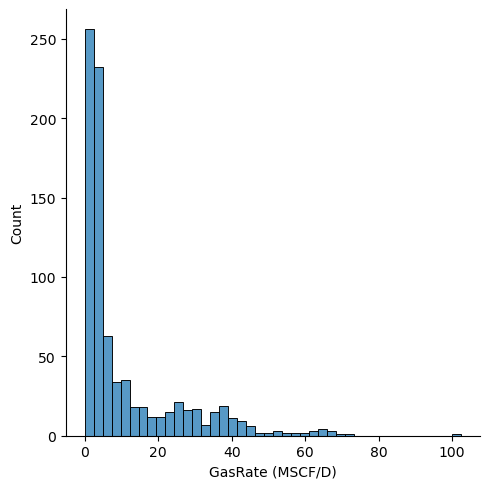

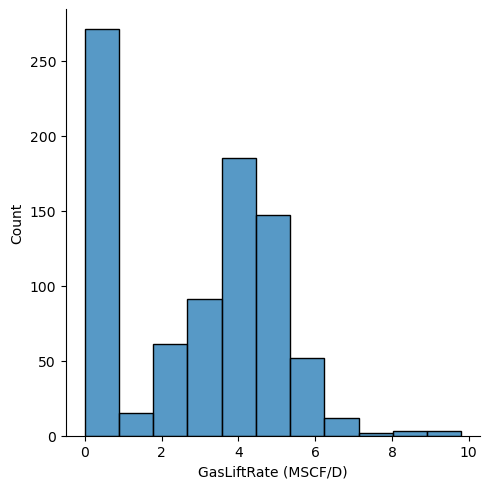

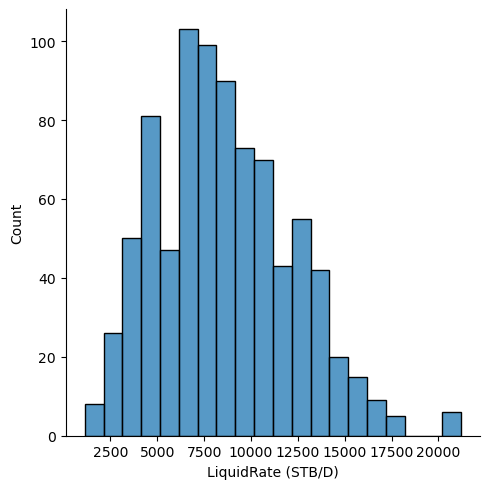

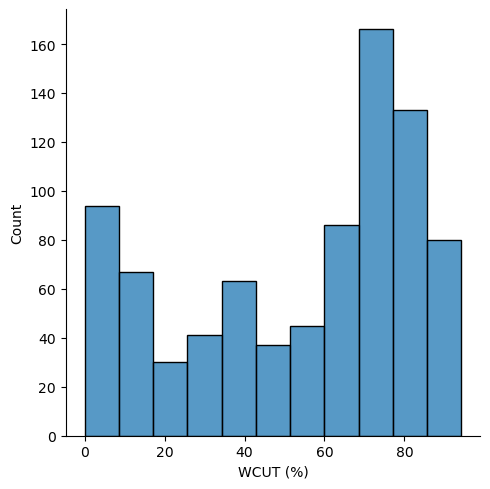

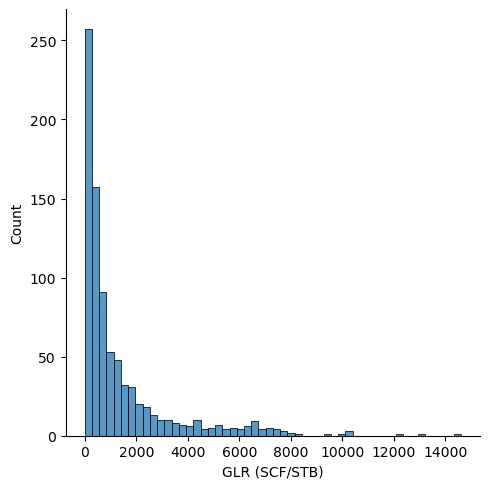

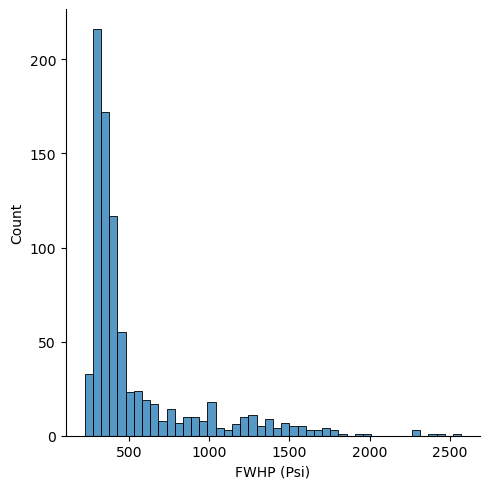

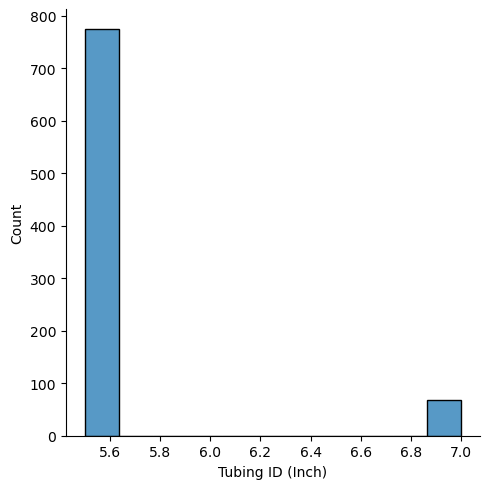

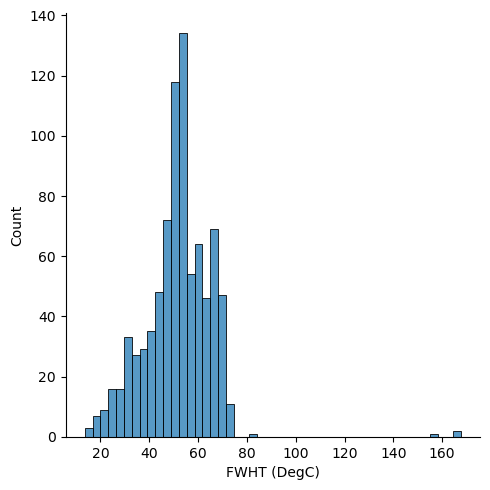

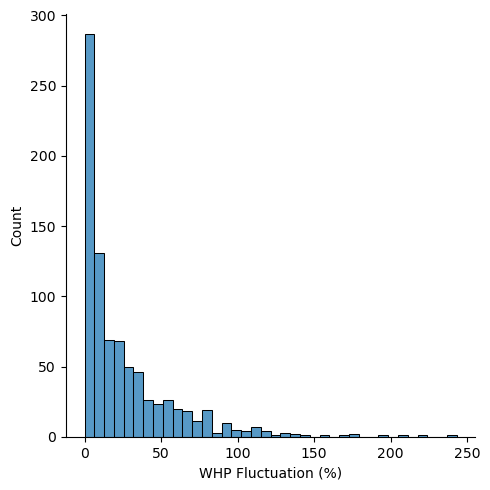

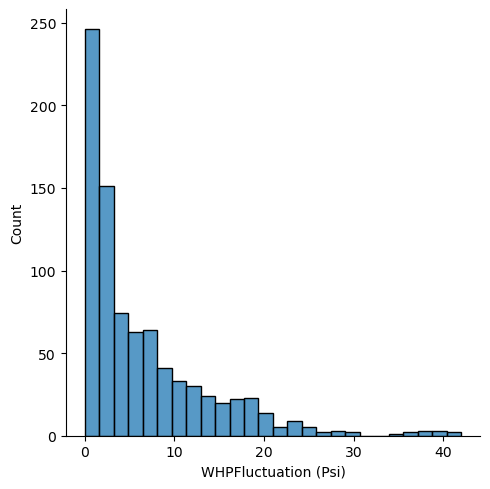

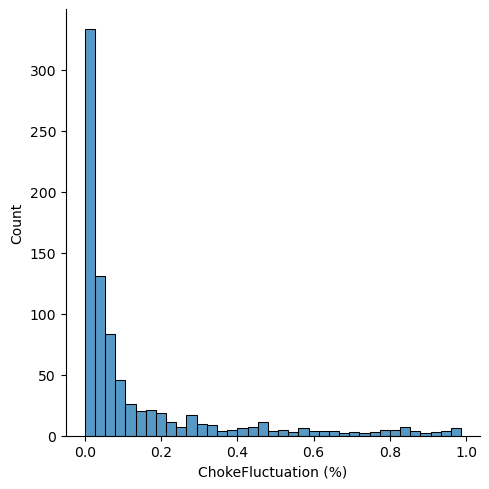

In [13]:
for i in numVar:
    sns.displot(trainDataset[i])
    plt.show()

**Cont**

In [ ]:
from matplotlib import pyplot as plt

# Median Developer Salaries by Age
dev_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

plt.plot(dev_x, dev_y)
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.show()
